In [1]:
# Library
from base import S3_SELECTED_CLUSTERS, plot3d
from lib import voxelize, make_mesh
from trimesh.voxel import matrix_to_points
from pandas import read_csv, DataFrame, merge
from numpy import array
from tqdm import tqdm

# Bar
pbar = tqdm(total=6)

# Read csv
selected_clusters:DataFrame = read_csv(S3_SELECTED_CLUSTERS)
pbar.update()

# Make mesh
mesh = make_mesh(
    selected_clusters[['norm_x','norm_y','norm_z']].as_matrix(), 
    selected_clusters[['x1','y1','z1','x2','y2','z2','x3','y3','z3']].as_matrix()
)
pbar.update()


 33%|███▎      | 2/6 [00:00<00:00,  8.53it/s]

In [2]:
voxed_coords = voxelize(mesh)

In [9]:
voxed_mesh = mesh.voxelized(pitch=1)
voxed_coords_points = matrix_to_points(voxed_coords.data, voxed_mesh.origin, voxed_mesh.pitch)

In [66]:
voxed_coords.data.shape
voxed_mesh = mesh.voxelized(pitch=0.1)
voxed_mesh.shape

(122, 121, 167)

In [133]:
voxed_coords.axis_order

'xyz'

In [68]:
from lib import read_binvox

sam = read_binvox(open("./voxelization.binvox",'rb'))
voxed_coords_points = matrix_to_points(sam.data, voxed_mesh.origin, voxed_mesh.pitch)
plot3d(
    voxed_coords_points[:,0],
    voxed_coords_points[:,1],
    voxed_coords_points[:,2],
)

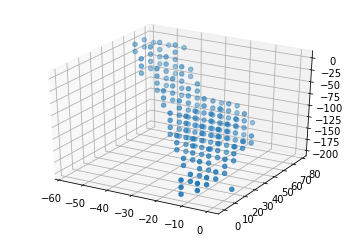

TrackedArray([ -6.4,   8.7, -15.2])

In [77]:
voxed_coords_points = matrix_to_points(sam.data, voxed_mesh.origin, voxed_mesh.pitch)
plot3d(
    voxed_coords_points[:,0],
    voxed_coords_points[:,1],
    voxed_coords_points[:,2],
)
voxed_mesh.origin

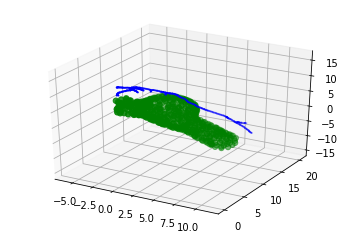

In [10]:
# Library
from base import S5_CENTERS, S4_REDUCED_POINTS
from pandas import read_csv, DataFrame
from numpy import array
from tqdm import tqdm

# Read csv
centers:DataFrame = read_csv(S5_CENTERS)
reduce_triangles:DataFrame = read_csv(S4_REDUCED_POINTS)

%matplotlib inline
# Plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure, show

fig = figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( 
    reduce_triangles['x'],
    reduce_triangles['y'],
    reduce_triangles['z'],
    c='green',
    s=30
)
ax.scatter( 
    (max(reduce_triangles['x']) - min(reduce_triangles['x']))*(centers['x']-min(centers['x']))/(max(centers['x'])-min(centers['x'])),
    (max(reduce_triangles['y']) - min(reduce_triangles['y']))*(centers['y']-min(centers['y']))/(max(centers['y'])-min(centers['y'])),
    (max(reduce_triangles['z']) - min(reduce_triangles['z']))*(centers['z']-min(centers['z']))/(max(centers['z'])-min(centers['z'])),
    c='blue',
    s=1
)



show()

In [78]:
from base import S3_SELECTED_CLUSTERS, S4_REDUCED_POINTS
from pandas import read_csv, DataFrame
from numpy import array
from tqdm import tqdm

# Read csv
selected_clusters:DataFrame = read_csv(S3_SELECTED_CLUSTERS)
reduce_triangles:DataFrame = read_csv(S4_REDUCED_POINTS)


mesh = make_mesh(
    selected_clusters[['norm_x','norm_y','norm_z']].as_matrix(), 
    selected_clusters[['x1','y1','z1','x2','y2','z2','x3','y3','z3']].as_matrix()
)
voxed_mesh = mesh.voxelized(1)
voxed_coords_points = matrix_to_points(voxed_mesh.matrix, voxed_mesh.origin, voxed_mesh.pitch)


In [110]:

orig_z = selected_clusters['centroid_x']
orig_x = selected_clusters['centroid_y']
orig_y = selected_clusters['centroid_z']

vox_x = voxed_coords_points[:,0]
vox_y = voxed_coords_points[:,1]
vox_z = voxed_coords_points[:,2]


In [129]:
mesh.subdivide?

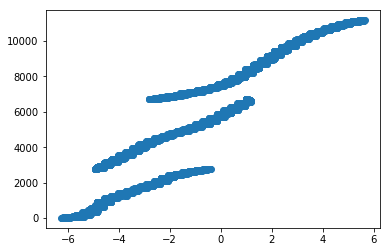

In [107]:
# print(voxed_coords_points[:,0])
# print(reduce_triangles['x'])



import matplotlib.pyplot as plt
import numpy as np
import matplotlib

j = 'centroid_x'

plt.scatter(
    selected_clusters[j],
    range(0, len(selected_clusters[j]))
)
plt.show()

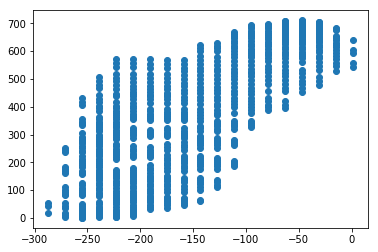

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

j = 2

plt.scatter(
    voxed_coords_points[:,j],
    range(0, len(voxed_coords_points[:,j]))
)
plt.show()